<a href="https://colab.research.google.com/github/Bjoyita/ImageProcessing/blob/main/BasicProcessing_Micrographs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
from skimage import io, filters
from skimage.exposure import adjust_gamma
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import numpy as np

**LOADING AND READING IMAGE**

In [2]:
p = io.imread("Particles.jpg")
p.shape

(1800, 1500)

**Cropping image**

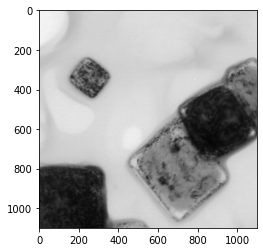

In [3]:
p_cr = p[100:1200, 200:1300]  #height and width
plt.imshow(p_cr, cmap='gray')

**Denoising and Sharpening image**

Text(0.5, 1.0, 'sigma 8')

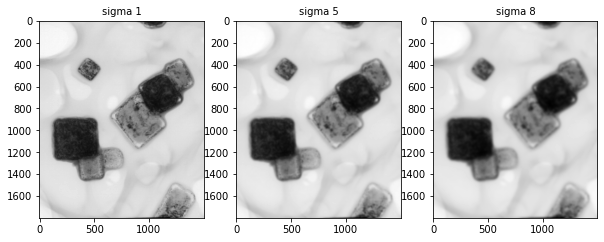

In [4]:
# Denoiing: Gaussian & Median

im_denoise =[]
for sigma in (1,5,8):
  im_gaussian = filters.gaussian(p, sigma)
  im_denoise.append(im_gaussian) 

fig, ax =plt.subplots(nrows=1,ncols=3,figsize =(10,10))

ax[0].imshow(im_denoise[0], cmap ='gray')
ax[0].set_title("sigma 1", fontsize = 10)
ax[1].imshow(im_denoise[1],cmap ='gray')
ax[1].set_title("sigma 5", fontsize = 10)
ax[2].imshow(im_denoise[2],cmap ='gray')
ax[2].set_title("sigma 8", fontsize = 10)

# Higher sigma value leading to more blurring


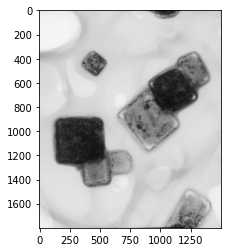

In [5]:
im_median = filters.median(p)
plt.imshow(im_median, cmap='gray')

**SHARPENING IMAGE** enhanced image = original + amount * (original - blurred) radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter

Text(0.5, 1.0, 'Sharpened')

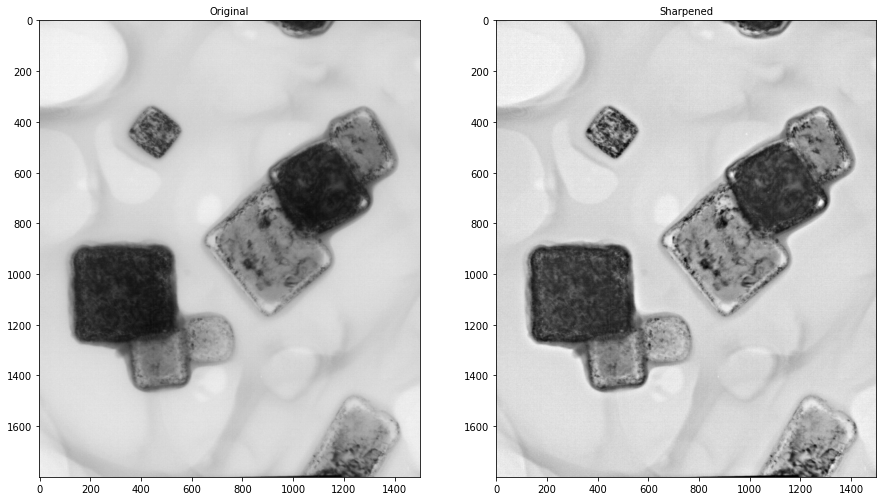

In [6]:
Sharpimg = filters.unsharp_mask(p, radius = 20.0, amount = 1.0)

fig, ax = plt.subplots(nrows =1, ncols =2, sharex = True, figsize =(15,15))
ax[0].imshow(p, cmap = 'gray')
ax[0].set_title("Original", fontsize = 10)
ax[1].imshow(Sharpimg, cmap ='gray')
ax[1].set_title("Sharpened",fontsize = 10 )

**Gamma correction for brightness**

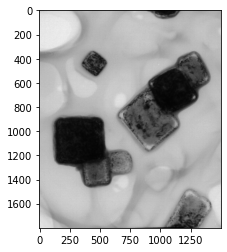

In [7]:
#Function transforms the input image pixelwise according to the equation O = I**gamma after scaling each pixel to the range 0 to 1

p_g = adjust_gamma(p, gamma=2, gain=1)
plt.imshow(p_g, cmap='gray')

Text(0.5, 1.0, 'gamma 2')

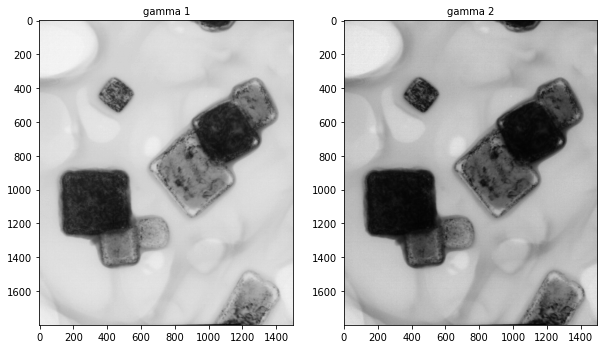

In [8]:
im_gamma =[]
for gamma in (1,2):
  p_g = adjust_gamma(p, gamma=gamma, gain=1)
  im_gamma.append(p_g) 

fig, ax =plt.subplots(nrows=1,ncols=2,figsize =(10,10))

ax[0].imshow(im_gamma[0], cmap ='gray')
ax[0].set_title("gamma 1", fontsize = 10)
ax[1].imshow(im_gamma[1],cmap ='gray')
ax[1].set_title("gamma 2", fontsize = 10)


**Thresholding: simple form of image segmentation**

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show>

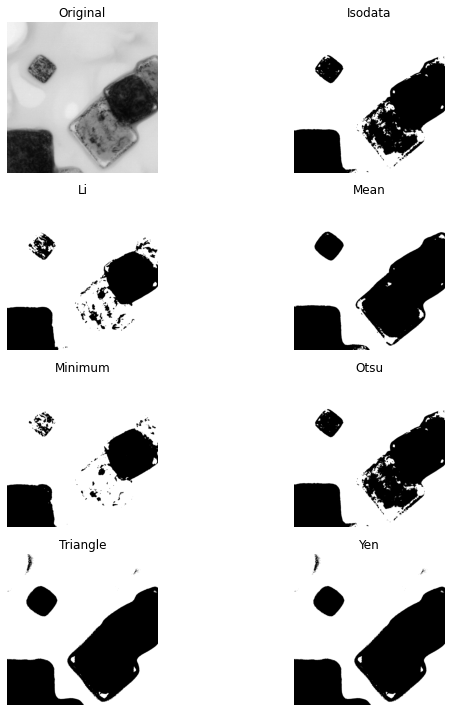

In [9]:
# Different types of threshold methods

from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(p_cr, figsize=(10, 10), verbose=True)
plt.show

In [10]:
# mean thresholding working in the above image compared to others. Let's get the mean threshold value.
from skimage.filters import threshold_mean
th = threshold_mean(p_cr)
print(th)

173.47119256198346


**FILTERS**

Text(0.5, 1.0, 'sobel_h')

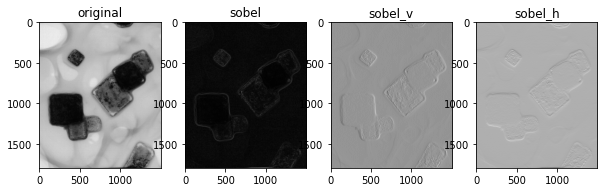

In [11]:
# Edge Detection: Sobel, Roberts and Canny filters
from skimage.filters import sobel,sobel_v, sobel_h
p_sobel = sobel(p_g, mode='reflect')
p_sobel_v=sobel_v(p_g)
p_sobel_h=sobel_h(p_g)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
ax[0].imshow(p_g, cmap='gray')
ax[0].set_title("original")
ax[1].imshow(p_sobel, cmap='gray')
ax[1].set_title("sobel")
ax[2].imshow(p_sobel_v, cmap='gray')
ax[2].set_title("sobel_v")
ax[3].imshow(p_sobel_h, cmap='gray')
ax[3].set_title("sobel_h")


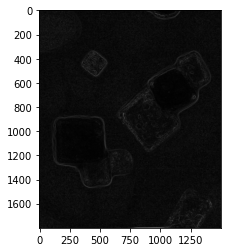

In [12]:
from skimage.filters import roberts
p_roberts = roberts(p_g)
plt.imshow(p_roberts, cmap='gray')

**CANNY- a multi-stage edge detector.** First, Smooth the image using a Gaussian with sigma width

Text(0.5, 1.0, 'sigma=2.0')

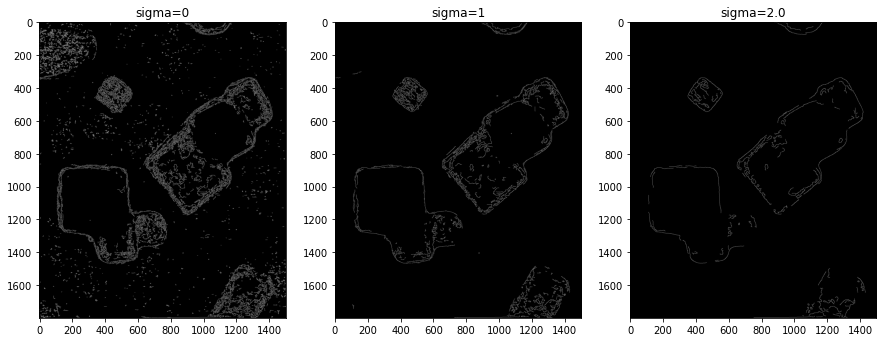

In [13]:
from skimage.feature import canny
img_f =[]
for sigma in range(0, 3, 1):
  img_canny= canny(p_g, sigma)
  img_f.append(img_canny)

fig, ax = plt.subplots(nrows =1, ncols =3, figsize = (15,15))

ax[0].imshow(img_f[0], cmap ='gray')
ax[0].set_title("sigma=0")
ax[1].imshow(img_f[1], cmap ='gray')
ax[1].set_title("sigma=1")
ax[2].imshow(img_f[2], cmap ='gray')
ax[2].set_title("sigma=2.0")


**GABOR FILTER**

In [14]:
im =[]
im1 = io.imread("Artificial.jpg", as_gray = True)
im1_g = adjust_gamma(im1, gamma=1.5, gain=1)
for degree in (0, 60, 90, 120):
        real,imag = filters.gabor(im1_g, frequency=0.05, theta =(degree*(np.pi)/180))
        im.append(real)


Text(0.5, 1.0, 'filter 120 degree')

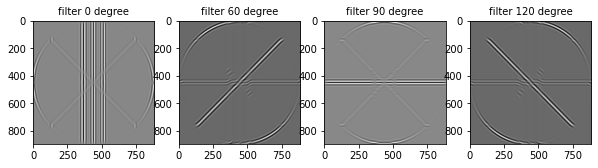

In [15]:
fig, ax = plt.subplots(nrows =1, ncols =4, figsize = (10,10))

ax[0].imshow(im[0], cmap ='gray_r')
ax[0].set_title("filter 0 degree", fontsize = 10)
ax[1].imshow(im[1],cmap ='gray_r')
ax[1].set_title("filter 60 degree", fontsize = 10)
ax[2].imshow(im[2],cmap ='gray_r')
ax[2].set_title("filter 90 degree", fontsize = 10)
ax[3].imshow(im[3],cmap ='gray_r')
ax[3].set_title("filter 120 degree", fontsize = 10)

In [16]:
p_gabor =[]

for degree in (0, 60, 90, 120):
        real,imag = filters.gabor(p, frequency=0.05, theta =(degree*(np.pi)/180))
        p_gabor.append(real)

Text(0.5, 1.0, 'filter 120 degree')

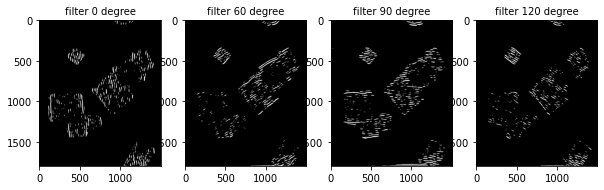

In [17]:
fig, ax = plt.subplots(nrows =1, ncols =4, figsize = (10,10))

ax[0].imshow(p_gabor[0], cmap ='gray')
ax[0].set_title("filter 0 degree", fontsize = 10)
ax[1].imshow(p_gabor[1],cmap ='gray')
ax[1].set_title("filter 60 degree", fontsize = 10)
ax[2].imshow(p_gabor[2],cmap ='gray')
ax[2].set_title("filter 90 degree", fontsize = 10)
ax[3].imshow(p_gabor[3],cmap ='gray')
ax[3].set_title("filter 120 degree", fontsize = 10)

**GABOR KERNEL** dtype{np.complex64, np.complex128}

    Specifies if the filter is single or double precision complex.
    skimage.filters.gabor_kernel(frequency, theta=0, bandwidth=1, sigma_x=None, sigma_y=None, n_stds=3, offset=0, dtype=<class 'numpy.complex128'>)


**Gabor kernel** returns complex array

In [18]:
from skimage.filters import gabor_kernel
kernels =[]
for degree in (0, 60,90, 120):
  gk = gabor_kernel(frequency=0.05, theta =(degree* np.pi)/ 180)
  kernels.append(gk.real)

Text(0.5, 1.0, 'filter 120 degree')

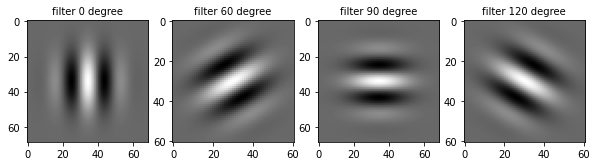

In [19]:
fig, ax = plt.subplots(nrows =1, ncols =4, figsize = (10,10))

ax[0].imshow(kernels[0], cmap ='gray')
ax[0].set_title("filter 0 degree", fontsize = 10)
ax[1].imshow(kernels[1],cmap ='gray')
ax[1].set_title("filter 60 degree", fontsize = 10)
ax[2].imshow(kernels[2],cmap ='gray')
ax[2].set_title("filter 90 degree", fontsize = 10)
ax[3].imshow(kernels[3],cmap ='gray')
ax[3].set_title("filter 120 degree", fontsize = 10)


Text(0.5, 1.0, 'filter 120 degree')

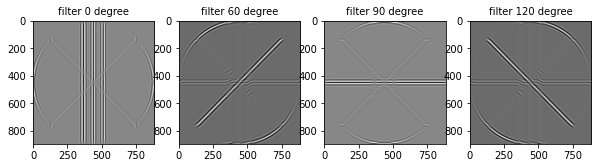

In [20]:
from scipy import ndimage as ndi
im_gk0 = ndi.convolve(im1, kernels[0])
im_gk60 = ndi.convolve(im1, kernels[1])
im_gk90 = ndi.convolve(im1, kernels[2])
im_gk120 = ndi.convolve(im1, kernels[3])

fig, ax = plt.subplots(nrows =1, ncols =4, figsize = (10,10))

ax[0].imshow(im_gk0, cmap ='gray_r')
ax[0].set_title("filter 0 degree", fontsize = 10)
ax[1].imshow(im_gk60,cmap ='gray_r')
ax[1].set_title("filter 60 degree", fontsize = 10)
ax[2].imshow(im_gk90,cmap ='gray_r')
ax[2].set_title("filter 90 degree", fontsize = 10)
ax[3].imshow(im_gk120,cmap ='gray_r')
ax[3].set_title("filter 120 degree", fontsize = 10)


Text(0.5, 1.0, 'filter 120 degree')

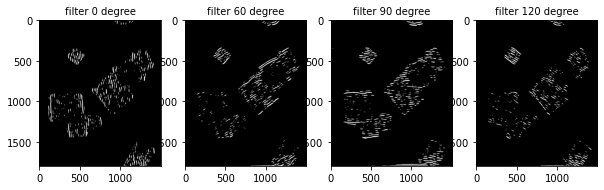

In [21]:
p_gk0 = ndi.convolve(p, kernels[0])
p_gk60 = ndi.convolve(p, kernels[1])
p_gk90 = ndi.convolve(p, kernels[2])
p_gk120 = ndi.convolve(p, kernels[3])

fig, ax = plt.subplots(nrows =1, ncols =4, figsize = (10,10))

ax[0].imshow(p_gk0, cmap ='gray')
ax[0].set_title("filter 0 degree", fontsize = 10)
ax[1].imshow(p_gk60,cmap ='gray')
ax[1].set_title("filter 60 degree", fontsize = 10)
ax[2].imshow(p_gk90,cmap ='gray')
ax[2].set_title("filter 90 degree", fontsize = 10)
ax[3].imshow(p_gk120,cmap ='gray')
ax[3].set_title("filter 120 degree", fontsize = 10)